# Results_CaseStudy

In [1]:
from main import main
import pandas as pd 
from sklearn.metrics import adjusted_rand_score , silhouette_score , normalized_mutual_info_score ,fowlkes_mallows_score


%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

def plot(file_path):
    data = pd.read_csv(file_path)
    
    plt.figure(figsize = (6,6))
    sns.scatterplot(data = data , 
                    x = "x" , 
                    y = "y" , 
                    hue = "group",
                    hue_order = ['A' , 'B' , 'C'],
                    palette = 'muted')
    plt.title("Spatial Distributions of Groups")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend(title = "Group")
    plt.show()

In [2]:
def evaluate_metrics(coordinate_file_truth , coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False):
    truth_data = pd.read_csv(coordinate_file_truth)
    pred_data = pd.read_csv(coordinate_file_pred)
    
    ARI = adjusted_rand_score(truth_data['group'] , pred_data['group'])
    NMI = normalized_mutual_info_score(truth_data['group'], pred_data['group'])
    Silhouette = silhouette_score(pred_data[['x', 'y']], pred_data['group'])
    FMI = fowlkes_mallows_score(truth_data['group'], pred_data['group'])
    SGD = main(coordinate_file_truth , coordinate_file_pred ,apply_gene_similarity = apply_gene_similarity , apply_AD_weight=apply_AD_weight)
    
    return {
        "ARI":ARI , 
        "NMI":NMI ,
        "Silhouette Coefficient":Silhouette,
        "FMI":FMI,
        "SGD":SGD
    }

## Case 1 : 边缘/中心

### 边缘

In [5]:
coordinate_file_truth = "data/simulate/Case1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case1/edge_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity = False , apply_AD_weight = False)

Graph Building took 0.01 seconds.
Getting edge attributes took 0.01 seconds.
Entire loop took 0.54069 seconds.
Average kernel execution time: 0.00541 seconds.
Entire loop took 0.59244 seconds.
Average kernel execution time: 0.00592 seconds.
Entire loop took 0.61800 seconds.
Average kernel execution time: 0.00618 seconds.


{'ARI': 0.5455688378269921,
 'NMI': 0.5568468396464958,
 'Silhouette Coefficient': 0.34753340616847317,
 'FMI': 0.7741665777804776,
 'SGD': 1.0702860390908062}

### 中心

In [6]:
coordinate_file_truth = "data/simulate/Case1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case1/center_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred ,apply_gene_similarity = False , apply_AD_weight = False)

Graph Building took 0.02 seconds.
Getting edge attributes took 0.00 seconds.
Entire loop took 0.56378 seconds.
Average kernel execution time: 0.00564 seconds.
Entire loop took 0.55820 seconds.
Average kernel execution time: 0.00558 seconds.
Entire loop took 0.62770 seconds.
Average kernel execution time: 0.00628 seconds.


{'ARI': 0.5455688378269921,
 'NMI': 0.5568468396464958,
 'Silhouette Coefficient': 0.17981067635626208,
 'FMI': 0.7741665777804776,
 'SGD': 1.4597201295484186}

## Case 2 : FN vs FP

### Case2.1:Binary

#### FP

In [31]:
coordinate_file_truth = "data/simulate/Case2.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2.1/N-A_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.02 seconds.
Getting edge attributes took 0.00 seconds.
Entire loop took 0.61707 seconds.
Average kernel execution time: 0.00617 seconds.
Entire loop took 0.63338 seconds.
Average kernel execution time: 0.00633 seconds.
Entire loop took 0.68523 seconds.
Average kernel execution time: 0.00685 seconds.


{'ARI': 0.5455688378269921,
 'NMI': 0.5568468396464958,
 'Silhouette Coefficient': 0.2398340695391199,
 'FMI': 0.7741665777804776,
 'SGD': 1.1074883797419046}

#### FN

In [32]:
coordinate_file_truth = "data/simulate/Case2.1/truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2.1/A-N_SpatialData.csv"

evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.01 seconds.
Getting edge attributes took 0.01 seconds.
Entire loop took 0.60876 seconds.
Average kernel execution time: 0.00609 seconds.
Entire loop took 0.61559 seconds.
Average kernel execution time: 0.00616 seconds.
Entire loop took 0.71826 seconds.
Average kernel execution time: 0.00718 seconds.


{'ARI': 0.5453852108087306,
 'NMI': 0.5418868089053984,
 'Silhouette Coefficient': 0.3449033229208199,
 'FMI': 0.7886562677642973,
 'SGD': 1.3369951295932547}

### Case2.2: 3 types 
Anomaly: B C 

Normal:A

type B is more serious than type C

#### B-A

In [448]:
coordinate_file_truth = "data/simulate/Case2.2/Truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2.2/BA_SpatialData.csv"

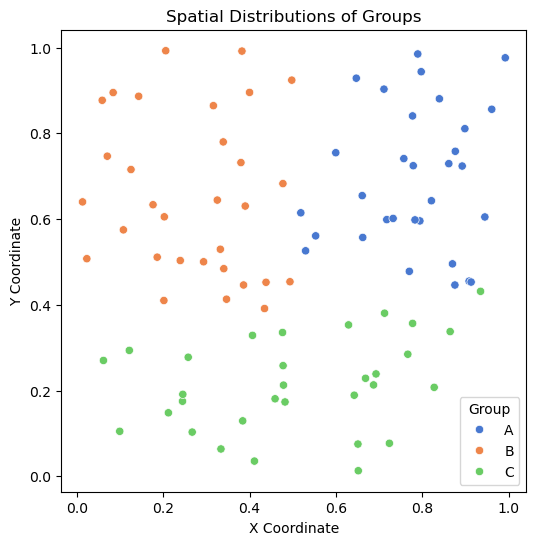

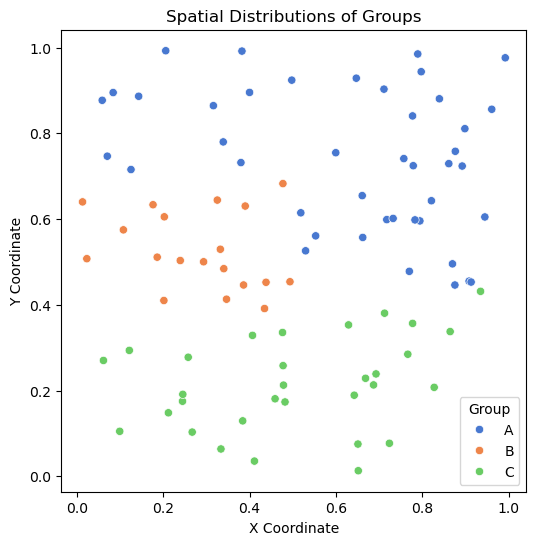

In [427]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [449]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.01 seconds.
Getting edge attributes took 3.12 seconds.
Entire loop took 0.34691 seconds.
Average kernel execution time: 0.00347 seconds.
Entire loop took 0.34199 seconds.
Average kernel execution time: 0.00342 seconds.
Entire loop took 0.81433 seconds.
Average kernel execution time: 0.00814 seconds.


{'ARI': 0.6891681870396649,
 'NMI': 0.7687589461923225,
 'Silhouette Coefficient': 0.251658084529804,
 'FMI': 0.79646086722093,
 'SGD': 0.3745835926248169}

#### C-A

In [450]:
coordinate_file_truth = "data/simulate/Case2.2/Truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case2.2/CA_SpatialData.csv"

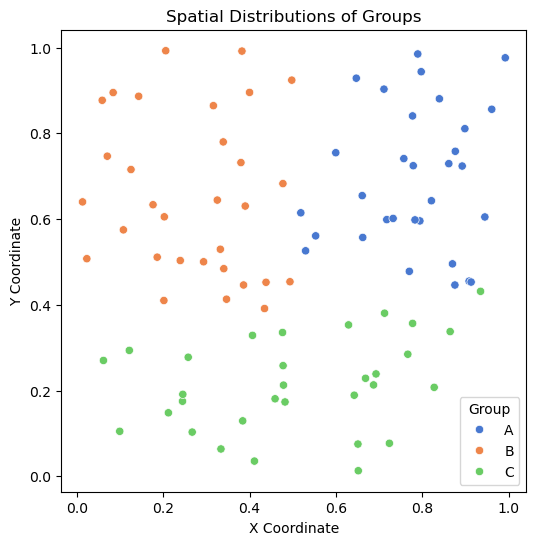

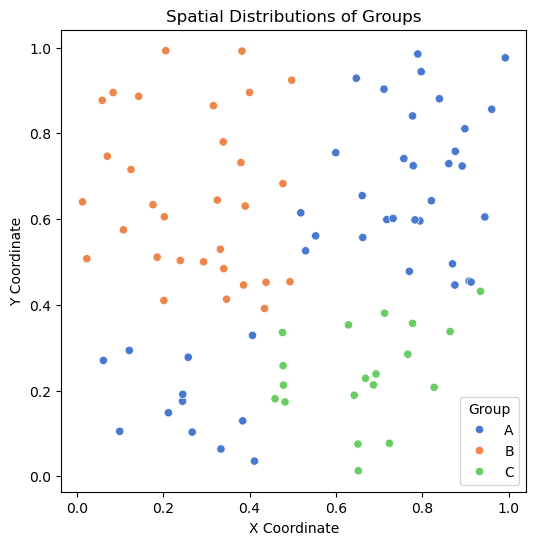

In [430]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [451]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= False , apply_AD_weight=True)

Graph Building took 0.02 seconds.
Getting edge attributes took 3.13 seconds.
Entire loop took 0.34982 seconds.
Average kernel execution time: 0.00350 seconds.
Entire loop took 0.33410 seconds.
Average kernel execution time: 0.00334 seconds.
Entire loop took 0.76702 seconds.
Average kernel execution time: 0.00767 seconds.


{'ARI': 0.6891681870396649,
 'NMI': 0.7687589461923224,
 'Silhouette Coefficient': 0.2376376035724321,
 'FMI': 0.79646086722093,
 'SGD': 0.3032936972310447}

## Case 4 : Gene Similarity

### Case 4.1:不同类的分到同一类

#### 相似

In [40]:
coordinate_file_truth = "data/simulate/Case4/4.1/test/sim_truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4/4.1/test/sim_pred_SpatialData.csv"

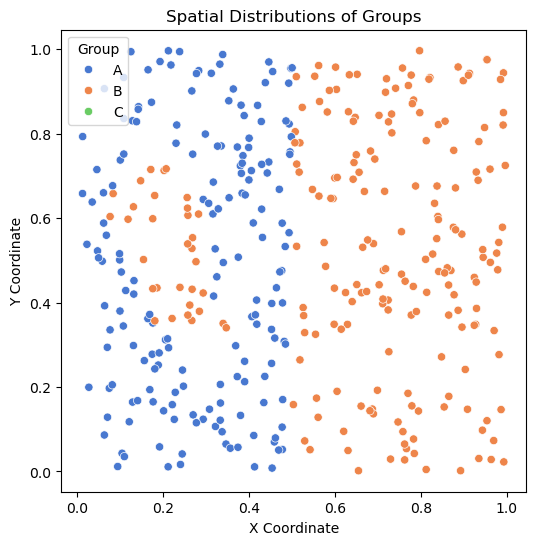

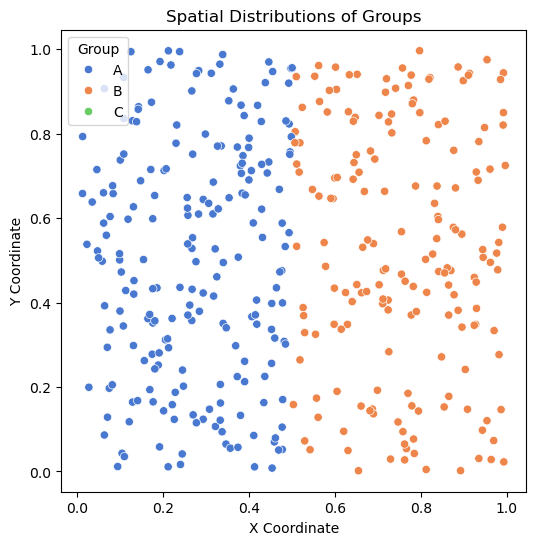

In [5]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [41]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.04 seconds.
Getting edge attributes took 0.01 seconds.
Entire loop took 14.24820 seconds.
Average kernel execution time: 0.14248 seconds.
Entire loop took 11.44943 seconds.
Average kernel execution time: 0.11449 seconds.
Entire loop took 13.08290 seconds.
Average kernel execution time: 0.13083 seconds.


{'ARI': 0.6958079250654646,
 'NMI': 0.6645138507722512,
 'Silhouette Coefficient': 0.3442246855857878,
 'FMI': 0.8485536034131528,
 'SGD': 0.15472648242168008}

#### 不相似

In [42]:
coordinate_file_truth = "data/simulate/Case4/4.1/test/dissim_truth_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4/4.1/test/dissim_pred_SpatialData.csv"

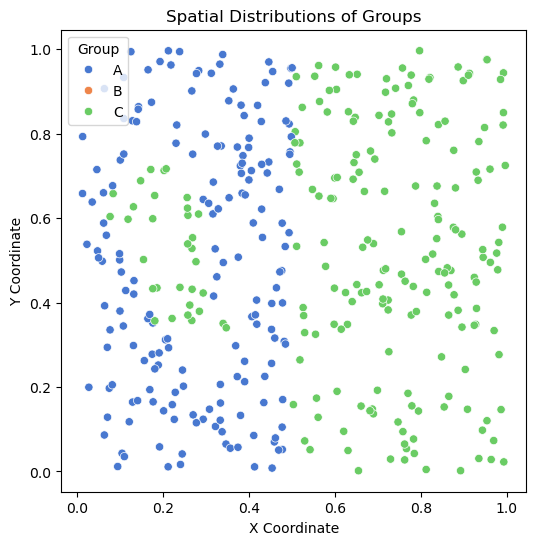

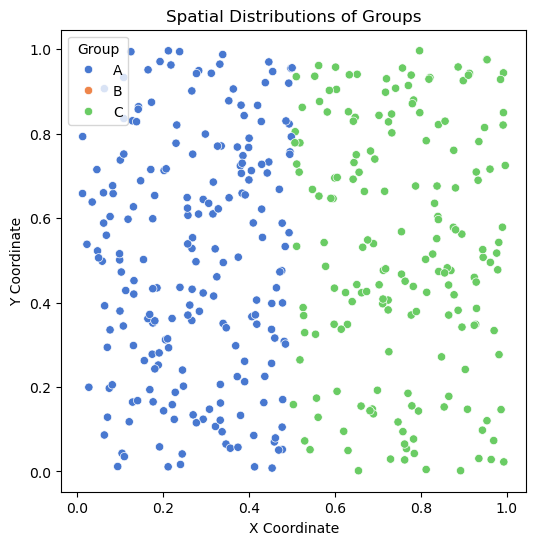

In [12]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [43]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.04 seconds.
Getting edge attributes took 0.00 seconds.
Entire loop took 13.58287 seconds.
Average kernel execution time: 0.13583 seconds.
Entire loop took 12.83294 seconds.
Average kernel execution time: 0.12833 seconds.
Entire loop took 14.94967 seconds.
Average kernel execution time: 0.14950 seconds.


{'ARI': 0.6958079250654646,
 'NMI': 0.6645138507722512,
 'Silhouette Coefficient': 0.3442246855708589,
 'FMI': 0.8485536034131528,
 'SGD': 0.8058962008372088}

### Case4.2:不同类分到同一类

#### 相似 B C

In [38]:
coordinate_file_truth = "data/simulate/Case4/4.1/test/sim_pred_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4/4.1/test/sim_truth_SpatialData.csv"

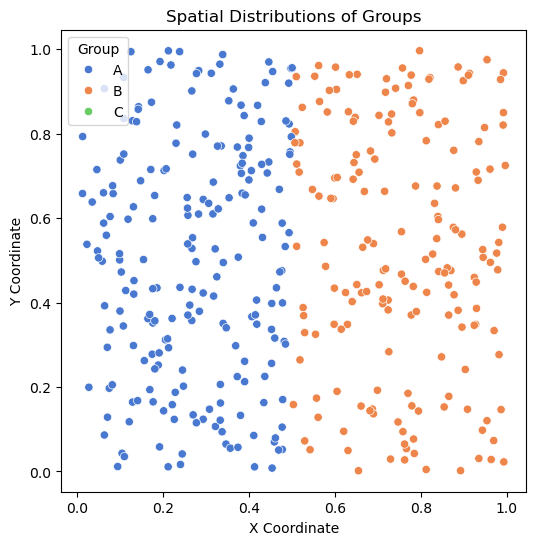

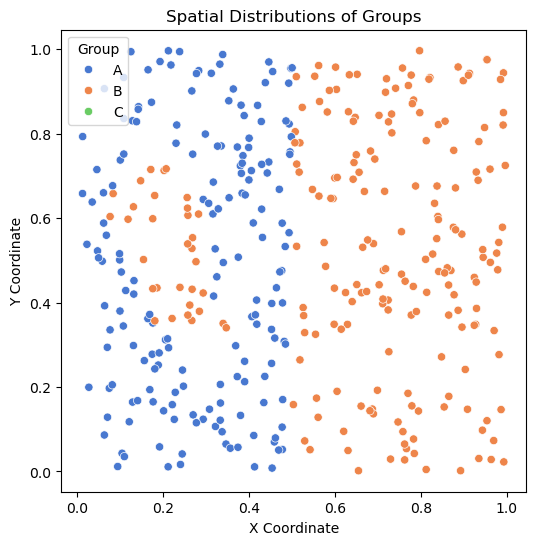

In [15]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [39]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.03 seconds.
Getting edge attributes took 0.02 seconds.
Entire loop took 12.71863 seconds.
Average kernel execution time: 0.12719 seconds.
Entire loop took 13.36265 seconds.
Average kernel execution time: 0.13363 seconds.
Entire loop took 13.76612 seconds.
Average kernel execution time: 0.13766 seconds.


{'ARI': 0.6958079250654646,
 'NMI': 0.6645138507722512,
 'Silhouette Coefficient': 0.22005656751425898,
 'FMI': 0.8485536034131528,
 'SGD': 0.07485438969216318}

#### 不相似

In [36]:
coordinate_file_truth = "data/simulate/Case4/4.1/test/dissim_pred_SpatialData.csv"
coordinate_file_pred = "data/simulate/Case4/4.1/test/dissim_truth_SpatialData.csv"

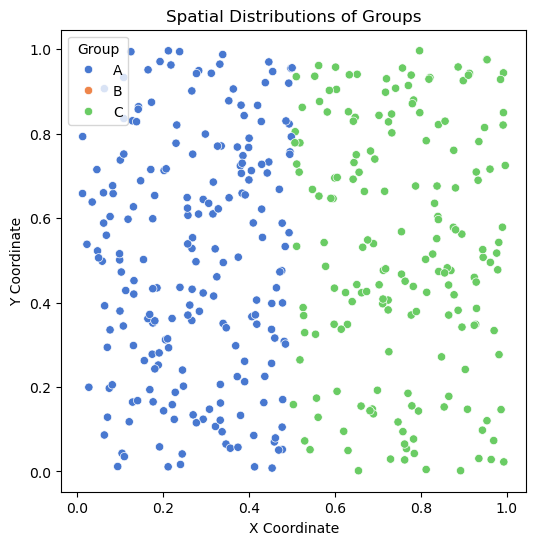

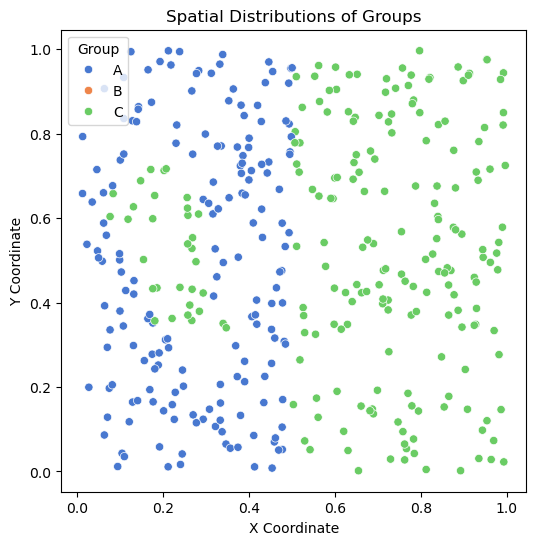

In [24]:
plot(coordinate_file_truth)
plot(coordinate_file_pred)

In [37]:
evaluate_metrics(coordinate_file_truth ,coordinate_file_pred , apply_gene_similarity= True , apply_AD_weight=False)

Graph Building took 0.04 seconds.
Getting edge attributes took 0.02 seconds.


KeyboardInterrupt: 